In [23]:
import numpy as np

In [24]:
X = np.array([[84,65,61,72,79,81],[64,77,77,76,55,70],[65,67,63,49,57,67],[74,80,69,75,63,74],[84,74,70,80,74,82]])

In [25]:
X

array([[84, 65, 61, 72, 79, 81],
       [64, 77, 77, 76, 55, 70],
       [65, 67, 63, 49, 57, 67],
       [74, 80, 69, 75, 63, 74],
       [84, 74, 70, 80, 74, 82]])

In [26]:
n_samples, n_features = X.shape

In [27]:
n_samples, n_features

(5, 6)

In [28]:
mean=np.mean(X, 0)

In [29]:
mean

array([74.2, 72.6, 68. , 70.4, 65.6, 74.8])

In [30]:
norm_X=X-mean

In [31]:
COV = 1/(n_samples-1)*norm_X.T@norm_X

In [32]:
COV

array([[ 95.2 , -13.9 , -23.75,  62.15, 100.35,  63.05],
       [-13.9 ,  41.3 ,  32.75,  44.95, -26.95,  -5.1 ],
       [-23.75,  32.75,  40.  ,  42.5 , -33.  ,  -8.5 ],
       [ 62.15,  44.95,  42.5 , 151.3 ,  53.7 ,  53.85],
       [100.35, -26.95, -33.  ,  53.7 , 110.8 ,  65.9 ],
       [ 63.05,  -5.1 ,  -8.5 ,  53.85,  65.9 ,  43.7 ]])

In [33]:
eig_val, eig_vec = np.linalg.eig(COV)

In [34]:
eig_val

array([3.06293191e+02, 1.63510310e+02, 9.89302953e+00, 2.60347035e+00,
       1.92077613e-14, 1.09951284e-14])

In [53]:
sum(eig_val[0:2])/sum(eig_val)

0.9740897784031078

In [35]:
eig_vec

array([[-0.53264253,  0.20279107, -0.34433806,  0.39437042,  0.63174096,
        -0.13549038],
       [ 0.00876193, -0.46059524, -0.81597078,  0.02185232, -0.28950361,
        -0.10460419],
       [ 0.04593605, -0.47328385,  0.37877077,  0.70892582, -0.0203358 ,
        -0.33676414],
       [-0.51955599, -0.64238594,  0.24891406, -0.45230979,  0.17629288,
         0.08523015],
       [-0.55131936,  0.32775478,  0.09651389, -0.13044526, -0.39100496,
        -0.50364506],
       [-0.37445103,  0.05145202,  0.0297077 ,  0.34614812, -0.57681316,
         0.77224847]])

In [40]:
z1=norm_X@eig_vec[:,0]

In [41]:
z1

array([-16.14860528,  10.61676743,  23.40212697,  -0.43966353,
       -17.43062559])

In [42]:
z2=norm_X@eig_vec[:,1]

In [43]:
z2

array([ 12.48396235, -15.67317428,  13.607117  ,  -7.77054621,
        -2.64735885])

In [45]:
RES = np.array([z1, z2])

In [46]:
RES

array([[-16.14860528,  10.61676743,  23.40212697,  -0.43966353,
        -17.43062559],
       [ 12.48396235, -15.67317428,  13.607117  ,  -7.77054621,
         -2.64735885]])

In [47]:
RES.T

array([[-16.14860528,  12.48396235],
       [ 10.61676743, -15.67317428],
       [ 23.40212697,  13.607117  ],
       [ -0.43966353,  -7.77054621],
       [-17.43062559,  -2.64735885]])

In [48]:
from sklearn.decomposition import PCA
import numpy as np
X = np.array([[84,65,61,72,79,81],[64,77,77,76,55,70],[65,67,63,49,57,67],[74,80,69,75,63,74],[84,74,70,80,74,82]])
pca=PCA(n_components=2)
pca.fit(X)
print(pca.transform(X))

[[-16.14860528 -12.48396235]
 [ 10.61676743  15.67317428]
 [ 23.40212697 -13.607117  ]
 [ -0.43966353   7.77054621]
 [-17.43062559   2.64735885]]


In [63]:
import urllib.request
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [65]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
X.shape, X_train.shape, X_test.shape

((70000, 784), (52500, 784), (17500, 784))

In [69]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [70]:
pca.n_components_

154

In [71]:
np.sum(pca.explained_variance_ratio_)

0.9504281669300785

In [72]:
X_recovered = pca.inverse_transform(X_reduced)

In [73]:
X_recovered.shape

(52500, 784)

Text(0.5, 1.0, 'Compressed')

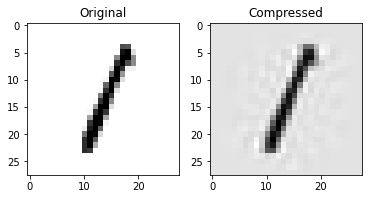

In [81]:
k = 1
some_digit = X_train[k].reshape(28, 28)
some_digit2 = X_recovered[k].reshape(28, 28)
plt.subplot(121)
plt.imshow(some_digit, cmap="binary")
plt.title("Original")
plt.subplot(122)
plt.imshow(some_digit2, cmap="binary")
plt.title("Compressed")

In [84]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [85]:
X

array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

In [86]:
t

array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002,
        6.1826027 ,  5.25981413, 12.87590683, 10.37776449, 11.38581581,
        4.90639327, 13.85357398, 12.55797604,  6.71363795,  6.42604892,
        6.44093576,  7.57980457,  9.65810183,  8.78337487,  7.45715896,
       10.47896666,  6.02708764,  7.46578743,  8.16526801,  9.01074732,
       12.11249808,  6.59427004,  9.55893438, 10.29576475,  5.15017381,
       10.43836431,  6.31954098,  5.3254858 , 13.65542448, 13.81325648,
       12.33135449,  7.58330612,  5.63292697, 11.16113333,  8.8607285 ,
        5.86257225,  9.37932141,  5.03649316, 13.28253187,  7.15133285,
       10.9565144 ,  7.65019666,  9.6139146 ,  9.86501197,  6.45460118,
       13.85050881, 12.01784373, 13.5669579 , 13.14593807, 10.34746352,
       13.40084895,  5.54641116,  6.55948394,  5.13864614,  7.77855511,
        8.37558613,  7.26979335, 12.52305599,  8.07470987,  7.36013436,
        9.82717906,  6.04056851, 12.2729174 ,  5.41501224, 14.01

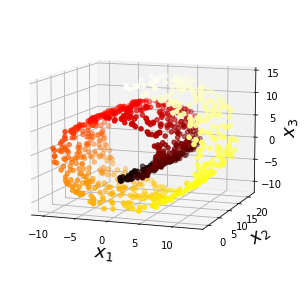

In [87]:
import matplotlib.pyplot as plt
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [88]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear")
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1)

In [89]:
X_reduced1 = lin_pca.fit_transform(X)
X_reduced2 = rbf_pca.fit_transform(X)
X_reduced3 = sig_pca.fit_transform(X)

Text(0.5, 1.0, 'Sigmoid kernel, $\\gamma=10^{-3}, r=1$')

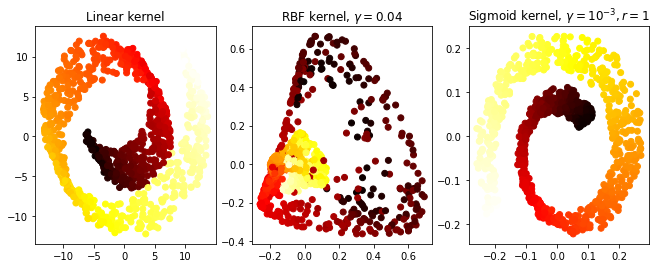

In [91]:
plt.figure(figsize=(11, 4))
plt.subplot(131)
plt.scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=t, cmap=plt.cm.hot)
plt.title("Linear kernel")
plt.subplot(132)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=t, cmap=plt.cm.hot)
plt.title("RBF kernel, $\gamma=0.04$")
plt.subplot(133)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=t, cmap=plt.cm.hot)
plt.title("Sigmoid kernel, $\gamma=10^{-3}, r=1$")